<a href="https://colab.research.google.com/github/elsiecolme/EscapeEarth/blob/main/Interns/Elise/DownloadData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
!pip install lightkurve 
import lightkurve as lk

In [3]:
!ls /content/gdrive/My\ Drive/EscapeEarthData

1161345_lc.csv	Activity-2		 bls_rps.npy	TeamA
1573836_lc.csv	all_targets_S014_v1.csv  DaniellesTEST	TeamB
2161623_lc.csv	bls_powers.npy		 df8.csv


In [4]:
sector14 = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/all_targets_S014_v1.csv', skiprows = 5)

In [5]:
sector14

,TICID,Camera,CCD,Tmag,RA,Dec
0,7582594,2,3,8.57,272.3966,45.8308
1,7582633,2,3,9.92,272.3288,45.9244
2,7582634,2,3,10.48,272.3307,45.9255
3,7583285,2,2,11.30,272.3711,47.2259
4,7584049,2,2,8.50,272.5282,47.0887
...,...,...,...,...,...,...
19995,1980752885,2,1,16.91,303.1632,60.2862
19996,1980968952,2,1,8.65,301.3995,63.7061
19997,1980968953,2,1,8.76,301.3993,63.7056
19998,1981207128,2,1,7.88,300.4913,65.8903


In [6]:
from lightkurve import search_lightcurvefile
tpf = search_lightcurvefile( "TIC 7582594", mission="TESS", sector = 14).download()
tpf

TessLightCurveFile(TICID: 7582594)

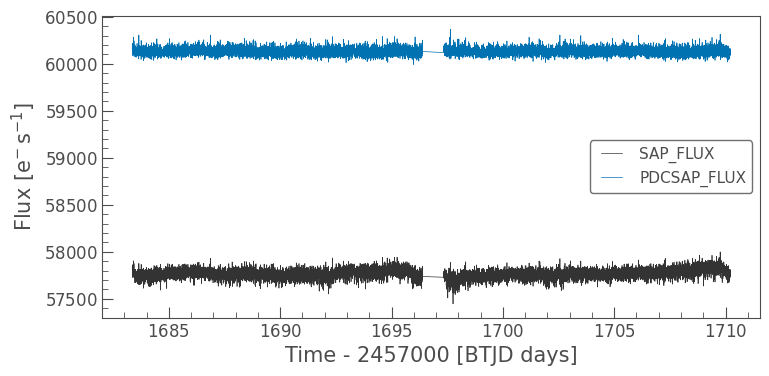

In [7]:
tpf.plot();

In [8]:
#def sec14(ID):
  TIC = 'TIC ' + ID
  tpf = search_lightcurvefile( TIC, mission="TESS", sector = 14).download()
  #return tpf.plot();

IndentationError: ignored

In [9]:
sector14['TICID'].to_numpy()[0:5]
TICID = sector14['TICID'].to_numpy()[0:5]

In [10]:
TICID

array([7582594, 7582633, 7582634, 7583285, 7584049])

In [41]:
for i in TICID:
  TIC = 'TIC ' + str(i)
  lcf = search_lightcurvefile(TIC, mission="TESS", sector = 14).download()
  lc = lcf.PDCSAP_FLUX

  print (lc)

TessLightCurve(TICID: 7582594)
TessLightCurve(TICID: 7582633)
TessLightCurve(TICID: 7582634)
TessLightCurve(TICID: 7583285)
TessLightCurve(TICID: 7584049)


In [28]:
!pip install astropy
from astropy.io import fits

In [32]:
lc.to_fits(path='sector14.fits', overwrite=True)

In [33]:
hdu = fits.open('sector14.fits')
type(hdu)

astropy.io.fits.hdu.hdulist.HDUList

In [35]:
hdu.info()

Filename: sector14.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   ()      
  1  LIGHTCURVE    1 BinTableHDU     28   18424R x 7C   [D, E, E, J, D, D, J]   


In [36]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'Unofficial data product' / institution responsible for file          
DATE    = '2020-11-05'         / file creation date.                            
CREATOR = 'lightkurve.LightCurve.to_fits()' / pipeline job and program used t   
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME=  / detector type                                                      
OBJECT  = '7584049 '        

In [37]:
print(lc)

TessLightCurve(TICID: 7584049)
